<a href="https://colab.research.google.com/github/bansi81/COVID19-EDA/blob/main/COVID_19(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Health Data Analysis(COVID-19 Trends and Correlations)**

In [63]:
import pandas as pd
df=pd.read_csv("/content/covid_19_data.csv")
print(df.isnull().sum()) # to check for missing values

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64




---

**Preprocessing of dataset**

In [32]:
df['Province/State'] = df['Province/State'].fillna('Unknown')
# Verify if missing values are handled
print(df.isnull().sum())
# Convert 'ObservationDate' to datetime format
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], format='%m/%d/%Y')
new_df=df.to_csv('cleaned_data.csv', index=False)

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64




---


**What is the trend of cases over time?**


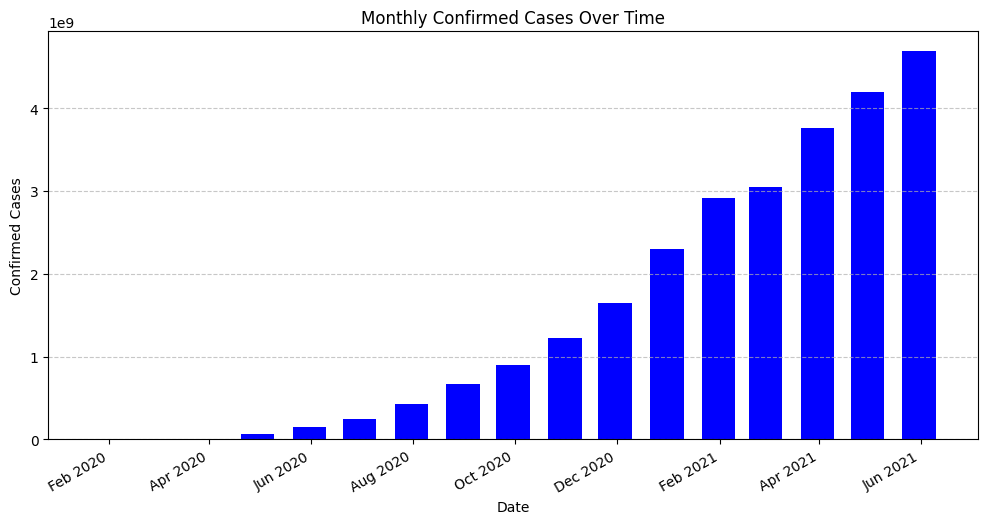

In [64]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
new_df = pd.read_csv("cleaned_data.csv")
# Convert 'ObservationDate' to datetime format
new_df["ObservationDate"] = pd.to_datetime(new_df["ObservationDate"])

# Group data by month and calculate total confirmed cases
monthly_cases = new_df.groupby(pd.Grouper(key="ObservationDate", freq="ME"))["Confirmed"].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(monthly_cases["ObservationDate"], monthly_cases["Confirmed"], color="blue", width=20)

plt.title("Monthly Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # skips 1 months in between
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Format as 'Feb 2020'
plt.gcf().autofmt_xdate()  # Auto rotate and align dates
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



---


**Which months had the highest spikes in cases and deaths?**

Top 3 Months with Highest Cases Spikes:
   ObservationDate  Cases_Spike
14      2021-03-31  702641956.0
11      2020-12-31  645939137.0
12      2021-01-31  620584277.0

Top 3 Months with Highest Deaths Spikes:
   ObservationDate  Deaths_Spike
14      2021-03-31    15667296.0
12      2021-01-31    11645557.0
11      2020-12-31    11313777.0


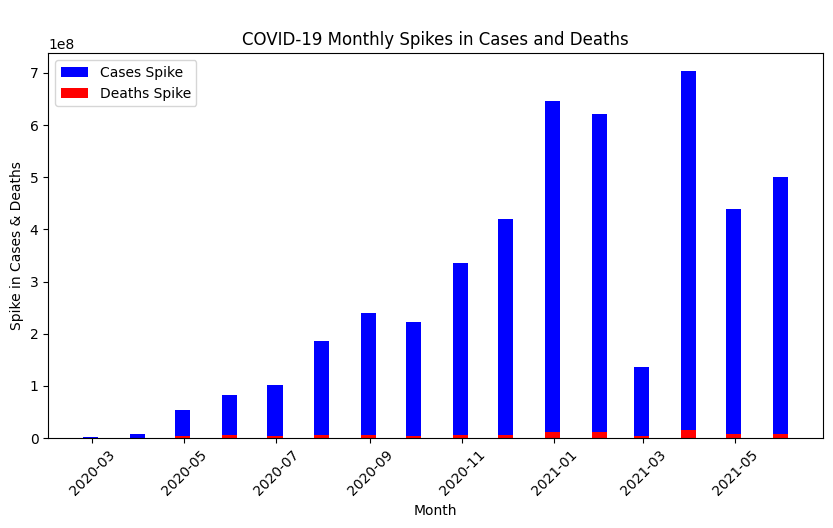

In [66]:
new_df = pd.read_csv("cleaned_data.csv")
new_df["ObservationDate"] = pd.to_datetime(new_df["ObservationDate"])
monthly_data = new_df.groupby(pd.Grouper(key="ObservationDate", freq="ME"))[["Confirmed","Deaths"]].sum().reset_index()
# Calculate Monthly Differences (Spikes)
monthly_data['Cases_Spike'] = monthly_data['Confirmed'].diff()
monthly_data['Deaths_Spike'] = monthly_data['Deaths'].diff()

# Display the top 3 months with highest spikes in cases
print("Top 3 Months with Highest Cases Spikes:")
print(monthly_data.nlargest(3, 'Cases_Spike')[['ObservationDate', 'Cases_Spike']])

# Display the top 3 months with highest spikes in deaths
print("\nTop 3 Months with Highest Deaths Spikes:")
print(monthly_data.nlargest(3, 'Deaths_Spike')[['ObservationDate', 'Deaths_Spike']])

plt.figure(figsize=(10, 5))

# Plot Cases Spike
plt.bar(monthly_data['ObservationDate'], monthly_data['Cases_Spike'], color='blue', label="Cases Spike",width=10)

# Plot Deaths Spike
plt.bar(monthly_data['ObservationDate'], monthly_data['Deaths_Spike'], color='red', label="Deaths Spike",width=10)

plt.xlabel("Month")
plt.ylabel("Spike in Cases & Deaths")
plt.title("\nCOVID-19 Monthly Spikes in Cases and Deaths")
plt.legend()
plt.xticks(rotation=45)
plt.show()




---


**Which countries had the fastest increase in cases over time?**

    Country/Region  GrowthRate
83      Guadeloupe   69.595960
158      Palestine   67.500000
170        Reunion   61.450216
136        Mayotte   52.777778
133     Martinique   26.817760
68   Faroe Islands   14.285714
72   French Guiana   12.597403
10           Aruba   11.904762
111         Kosovo   11.538777
15    Bahamas, The   11.111111


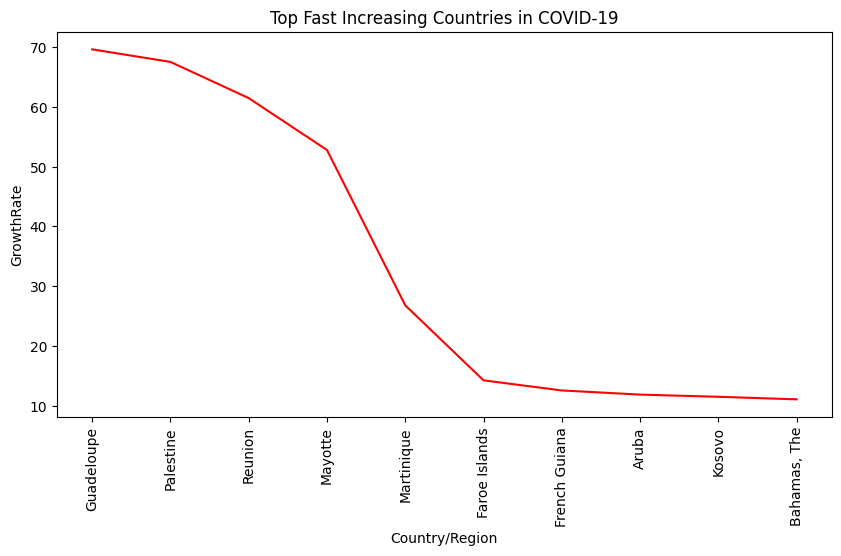

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns

cleaned_data = pd.read_csv("cleaned_data.csv")
cleaned_data["ObservationDate"] = pd.to_datetime(cleaned_data["ObservationDate"])

# Group by country and date, then calculate daily cases
daily_cases = cleaned_data.groupby(["Country/Region", "ObservationDate"])["Confirmed"].sum().reset_index()

# Calculate daily new cases
daily_cases["NewCases"] = daily_cases.groupby("Country/Region")["Confirmed"].diff()
daily_cases["NewCases"] = daily_cases["NewCases"].fillna(0)

# Calculate daily growth rate
daily_cases["GrowthRate"] = daily_cases.groupby("Country/Region")["Confirmed"].pct_change() * 100
daily_cases["GrowthRate"] = daily_cases["GrowthRate"].fillna(0)
daily_cases.replace([np.inf, -np.inf], 0, inplace=True)

# Calculate average growth rate for each country
average_growth_rate = daily_cases.groupby("Country/Region")["GrowthRate"].mean().reset_index()

# Sort by average growth rate in descending order
fastest_increase_countries = average_growth_rate.sort_values(by=["GrowthRate"], ascending=False)
top_10=fastest_increase_countries.head(10)
print(top_10)# Show top 10 countries
plt.figure(figsize=(10, 5))
sns.lineplot(x="Country/Region",y="GrowthRate",data=top_10,color="r")
plt.title("Top Fast Increasing Countries in COVID-19")
plt.xticks(rotation=90)
plt.show()



---


**Examining the Association Between Confirmed Cases and Fatalities**

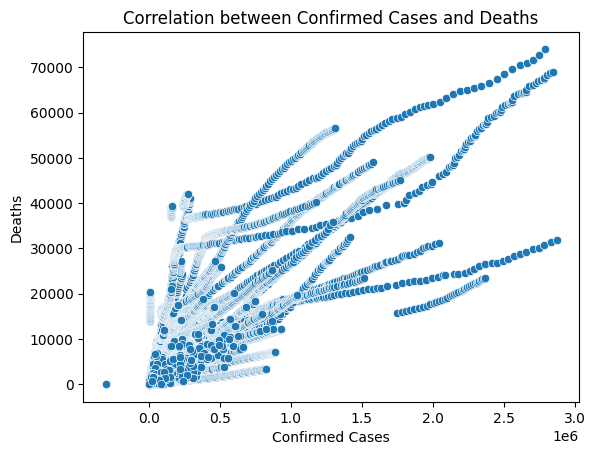

In [30]:
#to analyze correlation between no. of cases and deaths
sns.scatterplot(x="Confirmed", y="Deaths", data=cleaned_data)
plt.title("Correlation between Confirmed Cases and Deaths")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.show()

The scatter plot reveals a clear positive correlation between "Confirmed Cases" and "Deaths." This means that as the number of confirmed cases increases, the number of deaths generally also increases.

Upward Trend: The data points tend to move upwards from left to right, indicating a positive association between the two variables.

While the plot shows a relationship, it doesn't prove that an increase in confirmed cases directly causes an increase in deaths.
There could be other factors influencing both confirmed cases and deaths, such as healthcare infrastructure, age distribution, and socioeconomic conditions.

---
"Correlation Matrix of COVID-19 Factors"



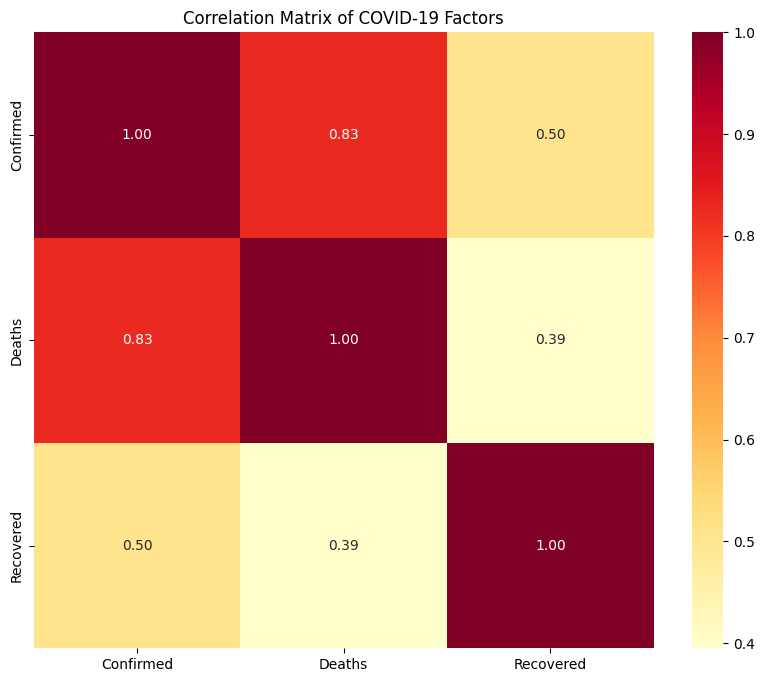

In [62]:
# To Select relevant columns for correlation analysis
selected_columns = ['Confirmed', 'Deaths', 'Recovered']
correlation_data = cleaned_data[selected_columns]
correlation_matrix = correlation_data.corr()

# Visualizing using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrRd", fmt=".2f")
plt.title("Correlation Matrix of COVID-19 Factors")
plt.show()

Darker colors indicate a stronger correlation, while lighter colors indicate a weaker correlation.

The diagonal values (1.00) are always 1 because a variable is perfectly correlated with itself.

**The correlation matrix reveals that:**

*   Confirmed cases and deaths are strongly correlated.
*   Confirmed cases and recovered cases have a moderate correlation.
*   Deaths and recovered cases have a weak correlation.

